# **1. Perkenalan Dataset**

# **Dataset Diabetes**

## **Penjelasan Kolom**

| Nama Kolom | Deskripsi |
|------------|-----------|
|Gender      |Jenis kelamin Pasien |
|Age | Usia Pasien|
|hypertension| Apakah pasien memiliki tekanan darah tinggi (Ya = 1, Tidak = 0)
|heart_disease |Apakah Pasien memiliki riwayat penyakit jantung (Ya = 1, Tidak = 0)|
|smoking_history|Apakah pasien pernah merokok|
|bmi | BMI (Body Mass Index) adalah ukuran lemak tubuh berdasarkan berat dan tinggi badan|
|HbA1c | HbA1c (Hemoglobin A1c) adalah ukuran kadar gula darah rata-rata seseorang selama 2-3 bulan terakhir|
|blood_glucose_level |Kadar glukosa darah mengacu pada jumlah glukosa dalam aliran darah pada waktu tertentu|
|diabetes| Apakah pasien mengalami diabetes atau tidak (Ya = 1, Tidak = 0)|

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [12]:
df = pd.read_csv('D:\Course\Laskar AI x Dicoding x NVIDIA\Membangun Sistem ML\Eksperimen_SML_Usamah-Putra-Firdaus\diabetes_prediction_raw.csv')
df

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\usama\AppData\Local\Temp\ipykernel_16036\460454692.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv('D:\Course\Laskar AI x Dicoding x NVIDIA\Membangun Sistem ML\Eksperimen_SML_Usamah-Putra-Firdaus\diabetes_prediction_raw.csv')


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **Data Understanding**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Pada feature `gender` mengalami kesalahan tipe data, seharusnya adalah `int`

In [14]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Data tidak memiliki nilai yang kosong

In [15]:
print('Data terduplikat: ', df.duplicated().sum())

Data terduplikat:  3854


In [16]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## **Data Visualization**

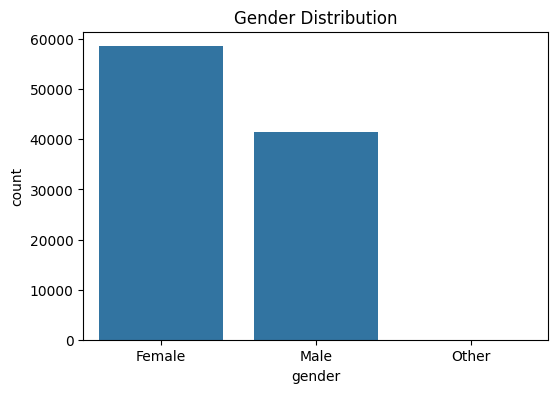

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

Dari visualisasi yang ditampilkan, perempuan lebih banyak terkena diabetes dibandingkan laki-laki. Kemudian terdapat gender `Other` yang tidak mempresentasikan gender seseorang, sehingga nanti akan dihapus

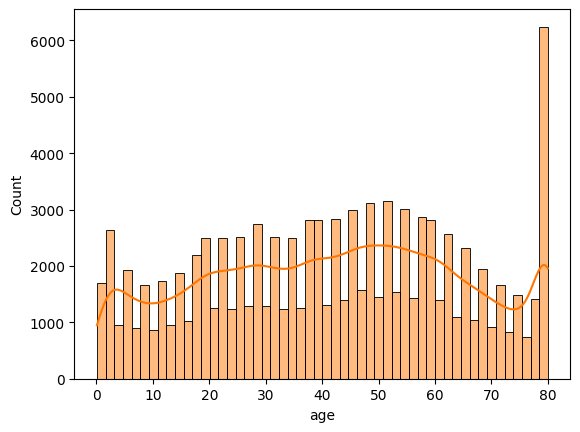

In [18]:
sns.histplot(df['age'],kde=True,color='#FF7601')
plt.show()

dari distribusi umur diatas, umur 80 lebih mendominasi dibandingkan umur yang lainnya

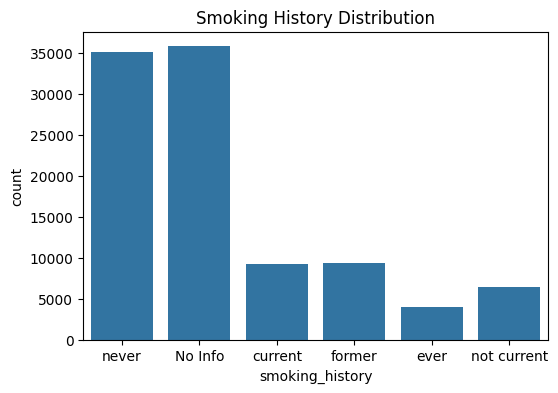

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

dari data yang digunakan, ternyata cukup banyak orang yang tidak merokok

<Axes: xlabel='age', ylabel='diabetes'>

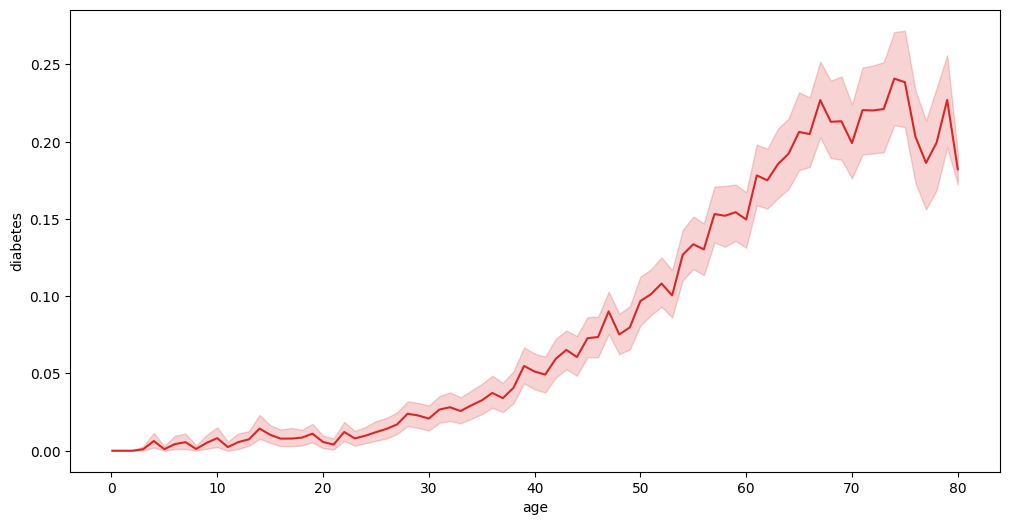

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['age'],y=df['diabetes'],color='#DC2525')

Dari visualisasi diatas, dapat diketahui bahwa semakin bertambahnya usia, semakin banyak yang terkena diabetes

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## **Handling Data Type**

In [21]:
df['age'] = df['age'].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int64  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 6.9+ MB


## **Handling Data Duplicate**

Mengahpus data duplikat

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
print('Data terduplikat : ', df.duplicated().sum())

Data terduplikat :  0


## **Drop data Unnecessary**

Disini saya menghapus nilai `Other` pada kolom `gender`, karena `Other` tidak mempresentasikan Gender seseorang

In [25]:
df = df[df['gender'].isin(['Female', 'Male'])]

In [26]:
print(df['gender'].unique())

['Female' 'Male']


In [27]:
df['gender'].value_counts()

gender
Female    56142
Male      39952
Name: count, dtype: int64

## **Binning**

Pada feature `smoking_history` karena `current`, `former`, dan `not current` memiliki arti yang sama (pernah merokok) jadi di gabungkan dengan `ever`

In [28]:
df.loc[:, 'smoking_history'] = df['smoking_history'].replace({
    'current': 'ever',
    'former': 'ever',
    'not current': 'ever'
})

df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,ever,23.45,5.0,155,0
4,Male,76,1,1,ever,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36,0,0,No Info,24.60,4.8,145,0
99996,Female,2,0,0,No Info,17.37,6.5,100,0
99997,Male,66,0,0,ever,27.83,5.7,155,0
99998,Female,24,0,0,never,35.42,4.0,100,0


In [29]:
df['smoking_history'].value_counts()

smoking_history
never      34395
No Info    32847
ever       28852
Name: count, dtype: int64

## **Encoding Variable**

In [30]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

C:\Users\usama\AppData\Local\Temp\ipykernel_16036\2029456211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = le.fit_transform(df['gender'])


In [31]:
df = pd.get_dummies(df, columns=['smoking_history'], drop_first=True)
# Mengidentifikasi kolom dummy yang baru dibuat dan mengonversinya
dummy_cols = [col for col in df.columns if 'smoking_history_' in col]
for col in dummy_cols:
    df[col] = df[col].astype(int)

In [32]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_ever,smoking_history_never
0,0,80,0,1,25.19,6.6,140,0,0,1
1,0,54,0,0,27.32,6.6,80,0,0,0
2,1,28,0,0,27.32,5.7,158,0,0,1
3,0,36,0,0,23.45,5.0,155,0,1,0
4,1,76,1,1,20.14,4.8,155,0,1,0


## **Normalization**

In [33]:
numerical_cols = ['age','bmi', 'HbA1c_level', 'blood_glucose_level']
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
scaler = MinMaxScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [34]:
df.to_csv('diabetes_prediction_preprocessing.csv', index=False)